In [1]:
#from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.colors as pc
#import scipy.stats as stats
import re

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "composite-keel-371920-24c2737df989.json"

import warnings
warnings.filterwarnings('ignore')

# Configurando objetos Pandas DataFrame e Numpy Arrays para exibirem todas as informações
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurando estilo e paleta de cores que serão utilizadas nos gráficos
sns.set_theme(style="whitegrid", palette="viridis")
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [2]:
df_books = pd.read_csv('Books.csv')
display(df_books.sample(1))
df_books.info()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
195124,0374218986,The Nanny and the Iceberg,Ariel Dorfman,1999,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0374218986.0...,http://images.amazon.com/images/P/0374218986.0...,http://images.amazon.com/images/P/0374218986.0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [3]:
df_ratings = pd.read_csv('Ratings.csv')
display(df_ratings.head(2))
df_ratings.info()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [4]:
df_users = pd.read_csv('Users.csv')
display(df_users.sample(4))
df_users.info()

,User-ID,Location,Age
120260,120261,"monterrey, nuevo leon, mexico",57.0
123328,123329,"corvallis, oregon, usa",NaN
139253,139254,"new windsor, new york, usa",48.0
200401,200402,"campbell, california, usa",35.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Verificação de Dados Nulos

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000007
Year-Of-Publication    0.000000
Publisher              0.000007
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000011
dtype: float64

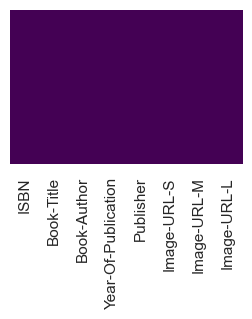

In [6]:
plt.figure(figsize=(3,2))
sns.heatmap(df_books.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df_books.isnull().sum() / len(df_books)

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

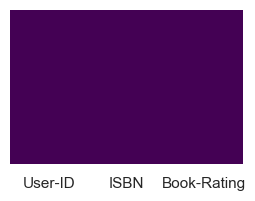

In [7]:
plt.figure(figsize=(3,2))
sns.heatmap(df_ratings.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df_ratings.isnull().sum() / len(df_ratings)

User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64

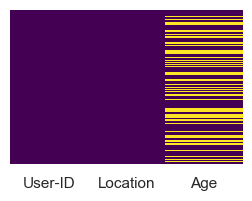

In [8]:
plt.figure(figsize=(3,2))
sns.heatmap(df_users.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
df_users.isnull().sum() / len(df_users)

### Verificação de Dados Infinitos

In [10]:
"""plt.figure(figsize=(3,2))
sns.heatmap(np.isinf(df_books.select_dtypes(include=['number'])),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
np.isinf(df_books.select_dtypes(include=['number'])).sum()"""

"plt.figure(figsize=(3,2))\nsns.heatmap(np.isinf(df_books.select_dtypes(include=['number'])),\n            yticklabels=False,\n            cbar=False,\n            cmap='viridis')\nnp.isinf(df_books.select_dtypes(include=['number'])).sum()"

User-ID        0
Book-Rating    0
dtype: int64

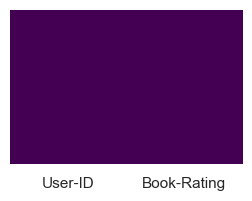

In [11]:
plt.figure(figsize=(3,2))
sns.heatmap(np.isinf(df_ratings.select_dtypes(include=['number'])),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
np.isinf(df_ratings.select_dtypes(include=['number'])).sum()

User-ID    0
Age        0
dtype: int64

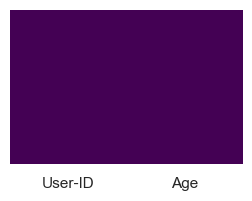

In [12]:
plt.figure(figsize=(3,2))
sns.heatmap(np.isinf(df_users.select_dtypes(include=['number'])),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
np.isinf(df_users.select_dtypes(include=['number'])).sum()

### Verificação de Dados Duplicados

In [14]:
df_books.duplicated().sum()

0

In [15]:
df_ratings.duplicated().sum()

0

In [16]:
df_users.duplicated().sum()

0

### Unificando as bases

In [72]:
# Realizar o merge dos DataFrames na coluna 'User-ID'
df_user_ratings = pd.merge(df_ratings, df_users, on='User-ID', how='left')

In [76]:
display(df_user_ratings.sample(5))

,User-ID,ISBN,Book-Rating,Location,Age
1018540,244171,0802130208,0,"moline, illinois, usa",51.0
784571,189835,0517092921,5,"honolulu, hawaii, usa",NaN
171415,37227,002862825X,6,"hamilton, ohio, usa",27.0
740521,178997,3442410665,0,"würzburg, bayern, germany",33.0
877409,212740,0553576801,4,"fort myers, florida, usa",NaN


In [78]:
display(df_books.sample(5))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
268803,9053330313,De dikke man,Ischa Meijer,1991,Prometheus
162977,0835605612,Shaman and the Medicine Wheel,Evelyn Eaton,1982,Quest Books (IL)
48409,0345340833,Adrift: Seventy-Six Days Lost at Sea,Steven Callahan,1991,Ballantine Books
109817,0609604074,Trans-Sister Radio,Chris A. Bohjalian,2000,Harmony Books
240089,1862322929,A Cup Of Kindness: A History Of The Royal Scot...,Justine Taylor,2004,Tuckwell Press


In [19]:
df_ratings['User-ID'].value_counts().head(10)

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
my_list = []
my_list

In [21]:
display(df_user_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149780 non-null  int64  
 3   Location     1149780 non-null  object 
 4   Age          840288 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 43.9+ MB


None